In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy as sp
from joblib import dump,load

In [266]:
df = pd.read_csv("advertising.csv")

In [267]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [268]:
df['total_spend'] = df["TV"]+ df ["Radio"]+ df["Newspaper"]
df.head()

,TV,Radio,Newspaper,Sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='Sales'>

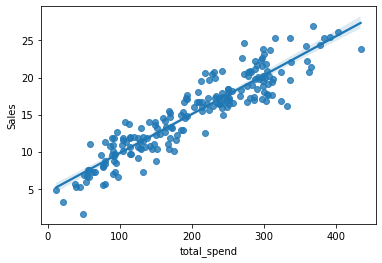

In [276]:
sns.regplot(data=df,x="total_spend",y="Sales")

In [270]:
X = df["total_spend"]
y = df["Sales"]



In [271]:
np.polyfit(X,y,deg=1)

array([0.0525585, 4.573573 ])

In [272]:
pot_spend=np.linspace(0,500,100)

In [273]:
predic_sales = 0.0525585 * pot_spend + 4.573573

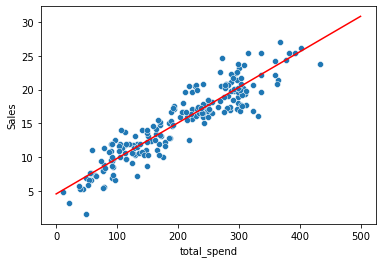

In [277]:
sns.scatterplot(data=df,x="total_spend",y="Sales")
plt.plot(pot_spend,predic_sales,color="red")

In [198]:
spend= 200
predic_sales = 0.0525585 * spend + 4.573573

In [199]:
predic_sales

15.085272999999999

In [200]:
np.polyfit(X,y,3)

array([ 4.49497819e-08, -7.06143726e-05,  7.48845278e-02,  2.94654345e+00])

In [201]:
pot_spend= np.linspace(0,500,100)


In [202]:
pred_sales = 4.49497819e-08*pot_spend**3+-7.06143726e-05 *pot_spend**2+7.48845278e-02*pot_spend+2.94654345e+00

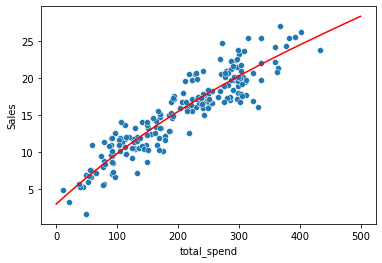

In [203]:
sns.scatterplot(data=df, y="Sales",x="total_spend")
plt.plot(pot_spend,pred_sales,color="red")

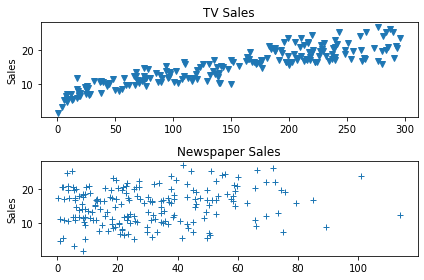

In [261]:
fig,axes=plt.subplots(nrows=2,ncols=1)
axes[0].plot(df["TV"],df["Sales"],"v")
axes[0].set_title("TV Sales")
axes[0].set_ylabel("Sales")
axes[1].plot(df["Newspaper"],df["Sales"],"+")
axes[1].set_title("Newspaper Sales")
axes[1].set_ylabel("Sales")
plt.tight_layout();

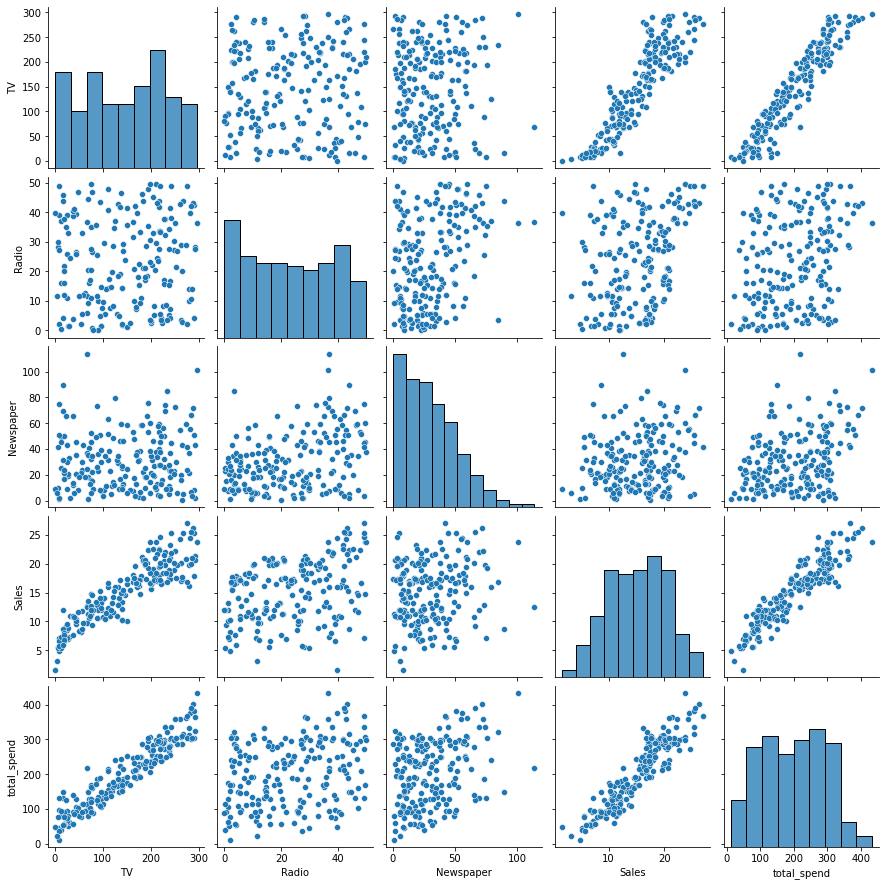

In [205]:
sns.pairplot(df)

In [206]:
X= df.drop('Sales',axis=1)
X

,TV,Radio,Newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0
...,...,...,...,...
195,38.2,3.7,13.8,55.7
196,94.2,4.9,8.1,107.2
197,177.0,9.3,6.4,192.7
198,283.6,42.0,66.2,391.8


In [207]:
y= df["Sales"]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [209]:
len(df)

200

In [210]:
X_train

,TV,Radio,Newspaper,total_spend
105,137.9,46.4,59.0,243.3
138,43.0,25.9,20.5,89.4
10,66.1,5.8,24.2,96.1
108,13.1,0.4,25.6,39.1
99,135.2,41.7,45.9,222.8
...,...,...,...,...
148,38.0,40.3,11.9,90.2
183,287.6,43.0,71.8,402.4
90,134.3,4.9,9.3,148.5
107,90.4,0.3,23.2,113.9


In [211]:
y_train

105    15.0
138     9.6
10     12.6
108     5.3
99     17.2
       ... 
148    10.9
183    26.2
90     14.0
107    12.0
54     20.2
Name: Sales, Length: 160, dtype: float64

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
model= LinearRegression()

In [246]:
model.fit(X_train.values,y_train)

LinearRegression()

In [215]:
test_predic=model.predict(X_test)
test_predic

array([14.32554824, 18.74396891, 20.08599395, 22.00800736, 11.62766655,
       15.50058593, 10.67477645, 10.19734453, 17.40474679, 21.29832169,
       12.6912526 , 19.38226556,  8.59143533, 18.22725172, 18.91732844,
        5.30538216, 10.75018178, 20.31599827, 20.43248384, 22.73052427,
       18.29268128,  7.77946678, 13.80780448, 24.92929778, 18.1363092 ,
       20.12556502, 19.06056545, 12.03587196, 24.86318896, 15.44464398,
       19.16624218, 11.15892656, 19.1799856 , 12.38897172, 23.67182679,
       14.07251966, 18.21567403, 10.76207736, 11.17779334, 20.76670971])

<AxesSubplot:xlabel='Sales', ylabel='Count'>

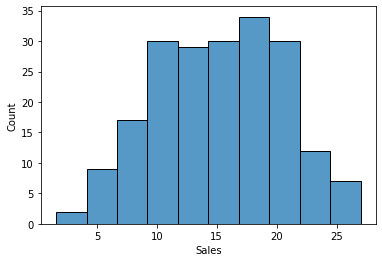

In [216]:
sns.histplot(data=df,x="Sales")

In [217]:
test_predic

array([14.32554824, 18.74396891, 20.08599395, 22.00800736, 11.62766655,
       15.50058593, 10.67477645, 10.19734453, 17.40474679, 21.29832169,
       12.6912526 , 19.38226556,  8.59143533, 18.22725172, 18.91732844,
        5.30538216, 10.75018178, 20.31599827, 20.43248384, 22.73052427,
       18.29268128,  7.77946678, 13.80780448, 24.92929778, 18.1363092 ,
       20.12556502, 19.06056545, 12.03587196, 24.86318896, 15.44464398,
       19.16624218, 11.15892656, 19.1799856 , 12.38897172, 23.67182679,
       14.07251966, 18.21567403, 10.76207736, 11.17779334, 20.76670971])

In [218]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [219]:
mean_absolute_error(y_test,test_predic)

1.0721851899549075

In [220]:
df['Sales'].mean()

15.130500000000005

In [221]:
np.sqrt(mean_squared_error(y_test,test_predic))

1.354765148451502

In [222]:
residual = y_test - test_predic

In [223]:
residual

156    0.974452
70    -0.443969
178   -3.285994
47     1.191993
86     0.372333
118    0.399414
125   -0.074776
32     3.002655
100   -0.704747
58     2.501678
31    -0.791253
62     1.317734
170   -0.191435
199    0.172748
23     1.582672
8     -0.505382
13     2.949818
15     2.084002
68    -1.532484
137   -1.930524
81    -0.992681
172   -0.179467
159   -0.907804
98     0.470702
153   -2.136309
92    -0.725565
141    0.139435
135   -0.435872
101   -1.063189
26    -0.444644
59    -0.766242
6      0.641073
139    1.520014
73    -1.388972
36     1.728173
57    -0.872520
21    -0.715674
134    0.037923
1     -0.777793
84     0.933290
Name: Sales, dtype: float64

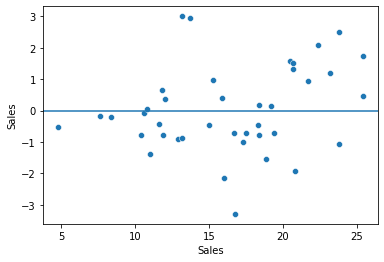

In [224]:
sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

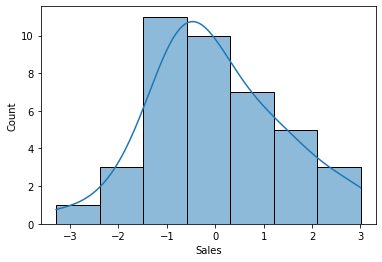

In [225]:
sns.histplot(residual,kde=True)

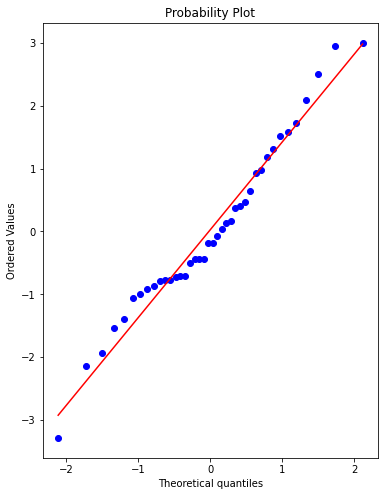

In [226]:
fig,ax=plt.subplots(figsize=(6,8))
m=sp.stats.probplot(residual,plot=ax)

In [242]:
final= LinearRegression()


In [249]:
final.fit(X,y)

LinearRegression()

In [231]:
final.coef_

array([ 0.01400011,  0.06655556, -0.04011001,  0.04044567])

In [232]:
y_hat=final.predict(X)

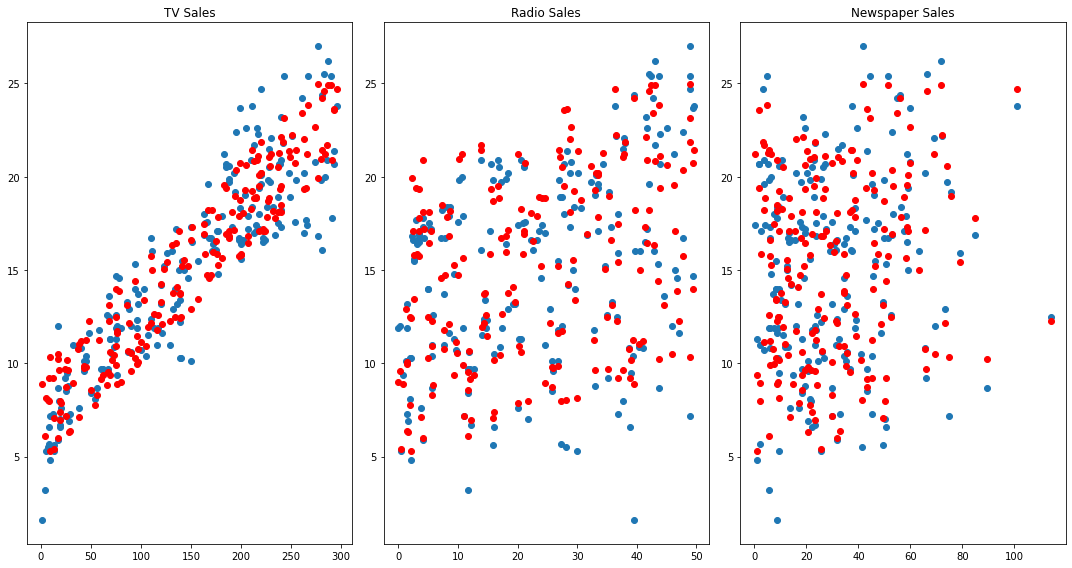

In [233]:
fig,axes=plt.subplots(ncols=3,nrows=1,figsize=(15,8))
axes[0].plot(df["TV"],df["Sales"],"o")
axes[0].plot(df["TV"],y_hat,"o",color="red")
axes[0].set_title("TV Sales")
axes[1].plot(df["Radio"],df["Sales"],"o")
axes[1].plot(df["Radio"],y_hat,"o",color="red")
axes[1].set_title("Radio Sales")
axes[2].plot(df["Newspaper"],df["Sales"],"o")
axes[2].plot(df["Newspaper"],y_hat,"o",color="red")
axes[2].set_title("Newspaper Sales")
plt.tight_layout();


In [234]:
dump(final,"Media_Advertising_model.joblib")

['Media_Advertising_model.joblib']

In [235]:
loaded_model=load("Media_Advertising_model.joblib")

In [236]:
loaded_model.coef_

array([ 0.01400011,  0.06655556, -0.04011001,  0.04044567])

In [237]:
X.shape

(200, 4)

In [250]:
#Imaginary Avertising Campaign
#149 TV, 22 Radio,12 Newspaper
#Sales
campaign=[[149,22,12,183]]

In [252]:
import warnings 
warnings.filterwarnings("ignore")

In [278]:
loaded_model.predict(campaign)

array([15.09560027])

 Conclusion:
 Use TV Advertising to increase your Sales.